# ÁîµÁΩëÈÄâÁ∫øËßÑÂàí-ÈÅ•ÊÑüÂàÜÂâ≤‰∏éË∑ØÂæÑÊêúÁ¥¢

In [300]:

import os
import matplotlib.pyplot as plt
from skimage import io
import seaborn as sns
import warnings
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pylab import mpl, plt
import matplotlib.patches as mpatches

# best font and style settings for notebook 
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = 'MiSans'


## ÈÅ•ÊÑüÂàÜÂâ≤Á±ªÂûãÁöÑÂü∫Êú¨ÂÆö‰πâ

In [301]:
# ÂÆö‰πâË°®Ê†ºÊï∞ÊçÆ
df_label = {
    "Á±ªÂà´ÁºñÂè∑": [0, 1, 2, 3, 4, 5, 6],
    "Á±ªÂà´ÂêçÁß∞ÔºàËã±ÊñáÔºâ": ["background", "building", "road", "water", "barren", "forest", "agriculture"],
    "Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ": ["ËÉåÊôØ", "Âª∫Á≠ë", "ÈÅìË∑Ø", "Ê∞¥‰Ωì", "Ë£∏Âúü", "ÊûóÂú∞", "ËÄïÂú∞"],
    "ËØ¥Êòé": [
        "ÈÄöÂ∏∏‰∏∫Êú™ÂàÜÁ±ªÂå∫Âüü",
        "ÊàøÂ±ã„ÄÅÂéÇÊàøÁ≠â",
        "ÂåÖÊã¨‰∏ªÂπ≤ÈÅì„ÄÅËæÖË∑ØÁ≠â",
        "ÂåÖÊã¨Ê≤≥ÊµÅ„ÄÅÊπñÊ≥äÁ≠â",
        "Ë£∏Èú≤ÂúüÂú∞„ÄÅÊ≤ôÂú∞Á≠â",
        "Ê£ÆÊûó„ÄÅÊ†ëÊú®Á≠â",
        "ÂÜúÁî∞„ÄÅÁßçÊ§çÂå∫Âüü"
    ]
}
# ÊûÑÈÄ†Á±ªÂà´ÁºñÂè∑Âà∞ RGB ÁöÑÊò†Â∞ÑÔºàÁ¥¢ÂºïÂç≥‰∏∫Á±ªÂà´ÁºñÂè∑Ôºâ
id2color = np.array(
    [
        [0, 0, 0],  # 0 - ËÉåÊôØ
        [220, 20, 60],  # 1 - Âª∫Á≠ë
        [128, 64, 128],  # 2 - ÈÅìË∑Ø
        [0, 0, 255],  # 3 - Ê∞¥‰Ωì
        [210, 180, 140],  # 4 - Ë£∏Âúü
        [34, 139, 34],  # 5 - ÊûóÂú∞
        [255, 255, 0],  # 6 - ËÄïÂú∞
    ],
    dtype=np.uint8,
)
df_label = pd.DataFrame(df_label)
df_label

Á±ªÂà´ÁºñÂè∑     Á±ªÂà´ÂêçÁß∞ÔºàËã±ÊñáÔºâ Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ         ËØ¥Êòé
0     0   background       ËÉåÊôØ   ÈÄöÂ∏∏‰∏∫Êú™ÂàÜÁ±ªÂå∫Âüü
1     1     building       Âª∫Á≠ë     ÊàøÂ±ã„ÄÅÂéÇÊàøÁ≠â
2     2         road       ÈÅìË∑Ø  ÂåÖÊã¨‰∏ªÂπ≤ÈÅì„ÄÅËæÖË∑ØÁ≠â
3     3        water       Ê∞¥‰Ωì   ÂåÖÊã¨Ê≤≥ÊµÅ„ÄÅÊπñÊ≥äÁ≠â
4     4       barren       Ë£∏Âúü   Ë£∏Èú≤ÂúüÂú∞„ÄÅÊ≤ôÂú∞Á≠â
5     5       forest       ÊûóÂú∞     Ê£ÆÊûó„ÄÅÊ†ëÊú®Á≠â
6     6  agriculture       ËÄïÂú∞    ÂÜúÁî∞„ÄÅÁßçÊ§çÂå∫Âüü

## Â±ïÁ§∫Ê°à‰æãÂõæÁâá

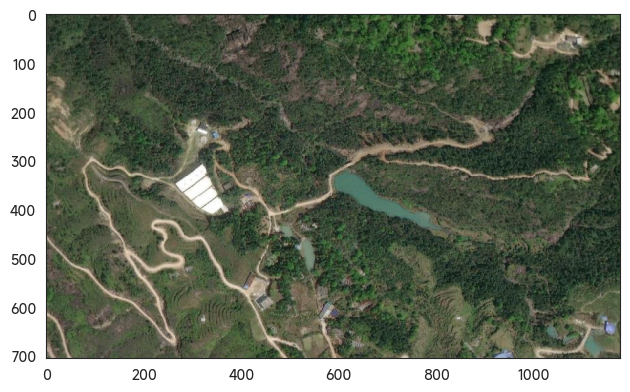

In [302]:
from infer_all import road_seg, all_seg, overlay_mask_on_image, resize_and_save, resize_and_save_2

img_path = "../photo/1173.png"
img_path = "../photo/wz_1.png"  # https://map.baidu.com/@13404714.629512599,3173311.453560461,17.89z/maptype%3DB_EARTH_MAP
# img_path = "../photo/wz_2.png"  # https://map.baidu.com/@13404670.488946166,3173333.393695217,18.64z/maptype%3DB_EARTH_MAP
img_path = "../photo/4.jpg"
img_path = "../photo/wz_0.png"
# img_path = "../photo/wz_3.jpg"
# img_path = "../photo/3.jpg"
# img_path = "../photo/14.png"
# img_path = "../photo/1173.png"
io.imshow(img_path)  # Êü•ÁúãÂéüÂõæ

In [303]:
# img_path = resize_and_save_2(img_path, (256, 256))

## ÈÅ•ÊÑüÂàÜÂâ≤ÔºåÂ§ö‰∏ìÂÆ∂Ê®°ÂûãMOE

In [304]:
from road_search import a_star_pathfinding
from infer_all import road_seg, all_seg, overlay_mask_on_image

# ‚úÖ ÈÅìË∑ØÂàÜÂâ≤Ê®°ÂûãÔºàÂè™ÂàÜÂá∫ road Á±ªÔºâ
road_mask = road_seg(
    image_path=img_path,
    config_path="configs/road_seg/pp_liteseg_stdc1_deepglobe_infer.yml",
    model_path="pp_liteseg_stdc1_deepglobe.pdparams",
    save_dir="../output/test",
)

# ‚úÖ Â§öÁ±ªÂú∞Áâ©ÂàÜÂâ≤Ê®°ÂûãÔºàËæìÂá∫0~6ÁöÑËØ≠‰πâmaskÔºâ
mask = all_seg(
    image_path=img_path,
    config_path="configs/segmenter/segmenter_rural2.yml",
    model_path="../output/segmenter_rural2/best_model/model.pdparams",
    save_dir="../output/test",
)

# ppliteseg rural 2
# mask = all_seg(
#     image_path=img_path,  # --image_path ÂèÇÊï∞
#     config_path="configs/pp_liteseg/pp_liteseg_rural_2.yml",  # --config ÂèÇÊï∞
#     model_path="output/rural_seg_pplite_2/best_model/model.pdparams",  # --model_path ÂèÇÊï∞
#     save_dir="../output/test",  # --save_dir ÂèÇÊï∞
# )

# mask = all_seg(
#     image_path=img_path,  # --image_path ÂèÇÊï∞
#     config_path="configs/pp_liteseg/pp_liteseg_rural_3.yml",  # --config ÂèÇÊï∞
#     model_path="../output/rural_seg_pplite_3/best_model_2/model.pdparams",  # --model_path ÂèÇÊï∞
#     save_dir="../output/test",  # --save_dir ÂèÇÊï∞
# )

# python tools/predict.py --config configs/pp_liteseg/pp_liteseg_rural_std2.yml --model_path output/rural_seg_pplite_std2-2/best_model/model.pdparams --image_path "../photo/14.png"  --save_dir ./output/rural_seg_pplite_std2-2
# mask = all_seg(
#     image_path=img_path,  # --image_path ÂèÇÊï∞
#     config_path="configs/pp_liteseg/pp_liteseg_rural_std2.yml",  # --config ÂèÇÊï∞
#     model_path="output/rural_seg_pplite_std2-2/best_model/model.pdparams",  # --model_path ÂèÇÊï∞
#     save_dir="../output/test",  # --save_dir ÂèÇÊï∞
# )

# python tools/predict.py --config configs/pp_liteseg/pp_liteseg_whdld.yml --model_path output/rural_seg_whdld/iter_3500-2/model.pdparams  --image_path ../photo/ --save_dir ../output/rural_seg_whdld 
# mask = all_seg(
#     image_path=img_path,  # --image_path ÂèÇÊï∞
#     config_path="configs/pp_liteseg/pp_liteseg_whdld.yml",  # --config ÂèÇÊï∞
#     model_path="output/rural_seg_whdld/iter_3500-2/model.pdparams",  # --model_path ÂèÇÊï∞
#     save_dir="../output/test",  # --save_dir ÂèÇÊï∞
# )

# ‚úÖ Ê∞¥‰ΩìÂàÜÂâ≤‰∏ì‰∏öÊ®°Âûã
# water_mask = all_seg(
#     image_path=img_path,
#     config_path="configs/segmenter/segmenter_rural2.yml",
#     model_path="../output/segmenter_rural2/iter_87500/model.pdparams",
#     save_dir="../output/test",
# )

# ‚úÖ ÂèØÊ∑ªÂä†‰ªªÊÑèÊï∞ÈáèÁöÑ‰∏ìÂÆ∂Ê®°Âûã


# ‚úÖ ÂèØÈÄâÂ§á‰ªΩ‰∏Ä‰ªΩÂâØÊú¨ÔºàÁî®‰∫éÂêéÁª≠Â§ÑÁêÜÔºâ
mask_2 = mask.copy()
mask[road_mask == 1] = 2  # 2: road
# mask[water_mask == 1] = 3  # 3: water

[üöó] Ê≠£Âú®Áî® PP-LiteSeg ÈÅìË∑ØÊ®°ÂûãÊé®ÁêÜÂõæÂÉèÔºö../photo/wz_0.png
[‚úÖ] ÊàêÂäüËØªÂèñÈÅìË∑ØÂàÜÂâ≤ÁªìÊûúÔºö../output/test\pseudo_color_prediction\wz_0.png
[üöÄ] Ê≠£Âú®Áî® PP-LiteSeg Êé®ÁêÜÂõæÂÉèÔºàÂ§öÂàÜÁ±ªÔºâÔºö../photo/wz_0.png
[‚úÖ] ÊàêÂäüËØªÂèñËæìÂá∫Êñá‰ª∂Ôºö../output/test\pseudo_color_prediction\wz_0.png


In [305]:
# io.imshow(mask)
mask_val = mask.copy()
df_label

Á±ªÂà´ÁºñÂè∑     Á±ªÂà´ÂêçÁß∞ÔºàËã±ÊñáÔºâ Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ         ËØ¥Êòé
0     0   background       ËÉåÊôØ   ÈÄöÂ∏∏‰∏∫Êú™ÂàÜÁ±ªÂå∫Âüü
1     1     building       Âª∫Á≠ë     ÊàøÂ±ã„ÄÅÂéÇÊàøÁ≠â
2     2         road       ÈÅìË∑Ø  ÂåÖÊã¨‰∏ªÂπ≤ÈÅì„ÄÅËæÖË∑ØÁ≠â
3     3        water       Ê∞¥‰Ωì   ÂåÖÊã¨Ê≤≥ÊµÅ„ÄÅÊπñÊ≥äÁ≠â
4     4       barren       Ë£∏Âúü   Ë£∏Èú≤ÂúüÂú∞„ÄÅÊ≤ôÂú∞Á≠â
5     5       forest       ÊûóÂú∞     Ê£ÆÊûó„ÄÅÊ†ëÊú®Á≠â
6     6  agriculture       ËÄïÂú∞    ÂÜúÁî∞„ÄÅÁßçÊ§çÂå∫Âüü

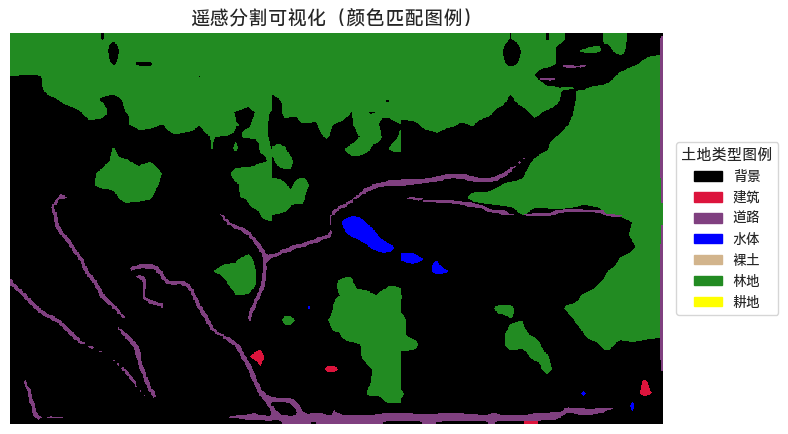

In [306]:
# ===== 2. Ê∏≤ÊüìÈ¢úËâ≤ÂõæÂÉè =====

seg_rgb = id2color[mask_val]  # shape: (H, W, 3)

# ===== 3. ÁªòÂà∂ÂõæÂÉèÂπ∂Ê∑ªÂä†Âõæ‰æã =====

plt.figure(figsize=(8, 6))
plt.title("ÈÅ•ÊÑüÂàÜÂâ≤ÂèØËßÜÂåñÔºàÈ¢úËâ≤ÂåπÈÖçÂõæ‰æãÔºâ", fontsize=14)
io.imshow(seg_rgb)  # ÊòæÁ§∫ RGB ÊòæÁ§∫ÂõæÂÉè
plt.axis("off")

# ÊûÑÈÄ†Âõæ‰æã
legend_patches = []
for idx, row in df_label.iterrows():
    class_id = row["Á±ªÂà´ÁºñÂè∑"]
    label_cn = row["Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ"]
    color_rgb = id2color[class_id] / 255.0  # ÂΩí‰∏ÄÂåñ
    patch = mpatches.Patch(color=color_rgb, label=label_cn)
    legend_patches.append(patch)

# Ê∑ªÂä†Âõæ‰æãÂà∞ÂõæÂÉèÂè≥‰æß
plt.legend(
    handles=legend_patches,
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
    title="ÂúüÂú∞Á±ªÂûãÂõæ‰æã",
    fontsize=10,
    title_fontsize=11,
    frameon=True
)

plt.tight_layout()
plt.show()

## Âú∞Âõæ‰ªªÊÑèÈÄâÁÇπÔºåËøõË°åË∑ØÂæÑËßÑÂàí

In [307]:
# # ÈöèÊú∫ÈÄâ‰∏§‰∏™‰∏çÂêåÁöÑÂèØÈÄöË°åÂå∫ÂüüÂÉèÁ¥†ÁÇπÔºàÊéíÈô§ÊàøÂ±ãÔºâ
# passable_values = [0, 2, 4, 5]  # ÂèØÈÄöË°åÂå∫Âüü
# passable_indices = np.argwhere(np.isin(mask_val, passable_values))
# 
# # ÈöèÊú∫ÈÄâÊã©‰∏§‰∏™ÁÇπ
# start_idx, end_idx = passable_indices[
#     np.random.choice(len(passable_indices), 2, replace=False)
# ]
# start_idx = tuple((20, 670))
# end_idx = tuple((950, 450))
# # ÂèØËßÜÂåñ
# plt.figure(figsize=(6, 6))
# plt.imshow(mask_val, cmap="gray")
# # Ëµ∑ÁÇπÂúÜÂúàÔºàoÔºâ
# plt.scatter(start_idx[1], start_idx[0], c="red", marker="o", s=200, label="Start")
# 
# # ÁªàÁÇπÂèâÂè∑ÔºàxÔºâ
# plt.scatter(end_idx[1], end_idx[0], c="red", marker="x", s=200, label="End")
# 
# plt.title("Âú∞Âõæ‰∏ä‰ªªÊÑè‰∏§ÁÇπÈÄâÁ∫øËßÑÂàí")
# plt.legend()
# plt.axis("off")
# plt.tight_layout()
# plt.show()
# 
# (start_idx, end_idx)

### ËøõË°åÈöèÊú∫ÊàñËÄÖÊåáÂÆöÈÄâÁÇπ

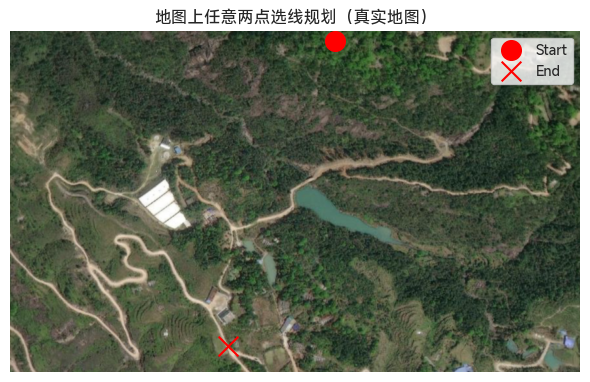

((20, 670), (650, 450))

In [308]:
# ÈöèÊú∫ÈÄâ‰∏§‰∏™‰∏çÂêåÁöÑÂèØÈÄöË°åÂå∫ÂüüÂÉèÁ¥†ÁÇπÔºàÊéíÈô§ÊàøÂ±ãÔºâ
passable_values = [0, 2, 4, 5]  # ÂèØÈÄöË°åÂå∫Âüü
passable_indices = np.argwhere(np.isin(mask_val, passable_values))

# ÈöèÊú∫ÈÄâÊã©‰∏§‰∏™ÁÇπ
start_idx, end_idx = passable_indices[
    np.random.choice(len(passable_indices), 2, replace=False)
]
start_idx = tuple((20, 670))
end_idx = tuple((650, 450))
# ÂèØËßÜÂåñ
plt.figure(figsize=(6, 6))
img_val = io.imread(img_path)[:, :, :3]
plt.imshow(img_val)
# Ëµ∑ÁÇπÂúÜÂúàÔºàoÔºâ
plt.scatter(start_idx[1], start_idx[0], c="red", marker="o", s=200, label="Start")

# ÁªàÁÇπÂèâÂè∑ÔºàxÔºâ
plt.scatter(end_idx[1], end_idx[0], c="red", marker="x", s=200, label="End")

plt.title("Âú∞Âõæ‰∏ä‰ªªÊÑè‰∏§ÁÇπÈÄâÁ∫øËßÑÂàíÔºàÁúüÂÆûÂú∞ÂõæÔºâ")
plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()

(start_idx, end_idx)

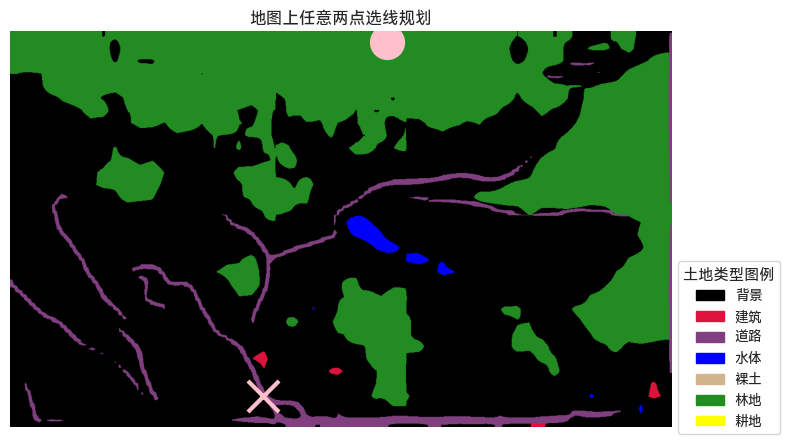

In [309]:
# ÊûÑÈÄ†ËØ≠‰πâÂõæÂÉèÔºàRGBÔºâ
seg_rgb = id2color[mask_val]

plt.figure(figsize=(8, 6))  # Âä†ÂÆΩ‰ª•ÁïôÂõæ‰æã‰ΩçÁΩÆ
plt.title("Âú∞Âõæ‰∏ä‰ªªÊÑè‰∏§ÁÇπÈÄâÁ∫øËßÑÂàí")
plt.imshow(seg_rgb)
plt.axis("off")

# ÊûÑÂª∫ legend patchÔºàÈ¢úËâ≤Âùó + ‰∏≠ÊñáÂêçÔºâ
legend_patches = []
for idx, row in df_label.iterrows():
    class_id = row["Á±ªÂà´ÁºñÂè∑"]
    label_cn = row["Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ"]
    color_rgb = id2color[class_id] / 255.0
    patch = mpatches.Patch(color=color_rgb, label=label_cn)
    legend_patches.append(patch)

# Ê∑ªÂä† legendÔºàÂõæÂè≥‰æß‰∏≠ÈÉ®Ôºâ
plt.legend(
    handles=legend_patches,
    loc='center left',
    bbox_to_anchor=(1.01, 0.2),
    borderaxespad=0.0,
    title="ÂúüÂú∞Á±ªÂûãÂõæ‰æã",
    fontsize=10,
    title_fontsize=11,
    frameon=True
)

# Ëµ∑ÁÇπÂúÜÂúàÔºàoÔºâ
plt.scatter(start_idx[1], start_idx[0], c="pink", marker="o", s=500, label="Start", linewidths=3)

# ÁªàÁÇπÂèâÂè∑ÔºàxÔºâ
plt.scatter(end_idx[1], end_idx[0], c="pink", marker="x", s=500, label="End", linewidths=3)

plt.tight_layout()
plt.show()


## ÂÆö‰πâÂèØÈÄöË°åÂå∫Âüü

In [310]:
df_label.iloc[passable_values]  # ÂèØÈÄöË°åÂå∫Âüü

Á±ªÂà´ÁºñÂè∑    Á±ªÂà´ÂêçÁß∞ÔºàËã±ÊñáÔºâ Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ         ËØ¥Êòé
0     0  background       ËÉåÊôØ   ÈÄöÂ∏∏‰∏∫Êú™ÂàÜÁ±ªÂå∫Âüü
2     2        road       ÈÅìË∑Ø  ÂåÖÊã¨‰∏ªÂπ≤ÈÅì„ÄÅËæÖË∑ØÁ≠â
4     4      barren       Ë£∏Âúü   Ë£∏Èú≤ÂúüÂú∞„ÄÅÊ≤ôÂú∞Á≠â
5     5      forest       ÊûóÂú∞     Ê£ÆÊûó„ÄÅÊ†ëÊú®Á≠â

## ÂõæÂÉèÂê´ÊúâÁöÑÂàÜÂâ≤Á±ªÂûã

In [311]:
print(np.unique(mask_val))
df_label.iloc[np.unique(mask_val)]  # ÂõæÁâá‰∏≠Âê´ÊúâÁöÑÂÖÉÁ¥†

[0 1 2 3 5]


Á±ªÂà´ÁºñÂè∑    Á±ªÂà´ÂêçÁß∞ÔºàËã±ÊñáÔºâ Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ         ËØ¥Êòé
0     0  background       ËÉåÊôØ   ÈÄöÂ∏∏‰∏∫Êú™ÂàÜÁ±ªÂå∫Âüü
1     1    building       Âª∫Á≠ë     ÊàøÂ±ã„ÄÅÂéÇÊàøÁ≠â
2     2        road       ÈÅìË∑Ø  ÂåÖÊã¨‰∏ªÂπ≤ÈÅì„ÄÅËæÖË∑ØÁ≠â
3     3       water       Ê∞¥‰Ωì   ÂåÖÊã¨Ê≤≥ÊµÅ„ÄÅÊπñÊ≥äÁ≠â
5     5      forest       ÊûóÂú∞     Ê£ÆÊûó„ÄÅÊ†ëÊú®Á≠â

## Cost MapÊûÑÈÄ†‰∏éÂèØËßÜÂåñ

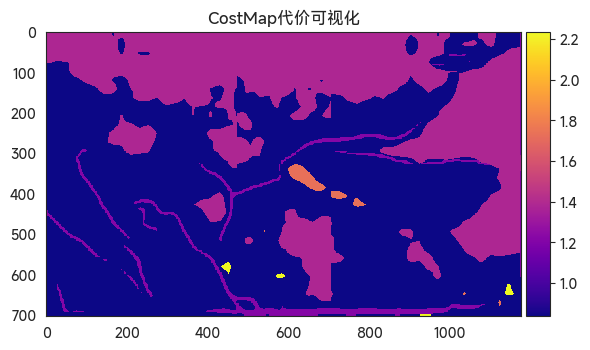

In [312]:
from queue import PriorityQueue

cost_map = np.full_like(mask_val, 1e5, dtype=float)  # ÈªòËÆ§È´ò‰ª£‰ª∑ÔºàÂ¶ÇÊàøÂ±ã„ÄÅ‰∏çÂèØÈÄöË°åÂå∫ÂüüÔºâ

cost_map[mask_val == 0] = 5  # ËÉåÊôØÔºàÂèØÈÄöË°åÔºâ
cost_map[mask_val == 2] = 30  # ÈÅìË∑ØÔºàÂèØÈÄöË°åÔºâ

cost_map[mask_val == 4] = 10  # Ë£∏ÂúüÔºàËæÉ‰ΩéÊàêÊú¨Ôºâ
cost_map[mask_val == 5] = 80  # Ê§çË¢´„ÄÅÊûóÂú∞Ôºà‰∏≠Á≠âÊàêÊú¨Ôºâ
cost_map[mask_val == 6] = 500  # ÂÜúÁî∞ÔºàÈ´òÊàêÊú¨Ôºâ
cost_map[mask_val == 3] = 1000  # Ê∞¥‰ΩìÔºàÈùûÂ∏∏È´òÊàêÊú¨Ôºâ

plt.figure(figsize=(6, 6))
plt.title("CostMap‰ª£‰ª∑ÂèØËßÜÂåñ")
io.imshow(np.log10(cost_map) ** 0.5, cmap='plasma')

## ‰ªªÊÑè‰∏§ÁÇπÁöÑË∑ØÂæÑÊêúÁ¥¢

In [313]:
# ======== 3. A* ÊêúÁ¥¢ ========
from road_search import a_star_pathfinding

# h, w = cost_map.shape

path = a_star_pathfinding(start_idx=start_idx, end_idx=end_idx, cost_map=cost_map)

[‚úÖ] ÊàêÂäüÊâæÂà∞‰ªéËµ∑ÁÇπÂà∞ÁªàÁÇπÁöÑË∑ØÂæÑÔºÅ
Path length (pixels): 631


## Ë∑ØÂæÑËæìÂá∫ÁöÑÊ†áÂáÜÊ†ºÂºè

In [314]:
# ======== 4.5 ËæìÂá∫Ë∑ØÂæÑÁü©Èòµ ========
if path:
    path_array = np.array([[x, y] for (x, y) in path])  # shape (n, 2)

# io.imshow(seg_rgb)
pd.DataFrame(path_array, columns=["x", "y"])

x    y
0     20  670
1     21  669
2     22  668
3     23  667
4     24  666
..   ...  ...
626  646  453
627  647  452
628  648  451
629  649  450
630  650  450

[631 rows x 2 columns]

## ËÆ°ÁÆóË∑ØÂæÑÁöÑÊÄª‰ª£‰ª∑

In [315]:
road_cost_list = [cost_map[i] for i in path]
np.array(road_cost_list).sum()

12455.0

## Ë∑ØÂæÑÂú®Âú∞Âõæ‰∏äÁöÑÂèØËßÜÂåñ

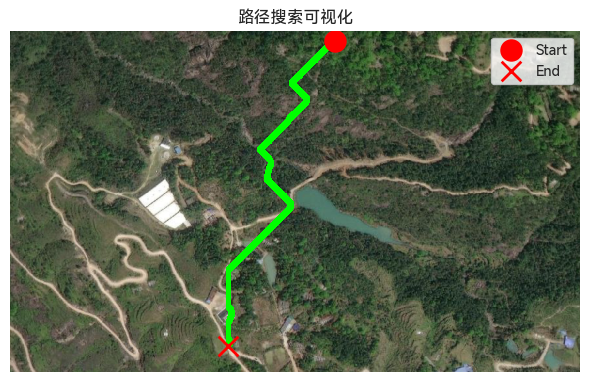

In [316]:
img = io.imread(img_path)  # shape: (H, W, 3)

# === ÁªòÂà∂Ë∑ØÂæÑÔºàÁªøËâ≤Ôºâ ===
overlay = img.copy()[:, :, :3]
# overlay = overlay_mask_on_image(overlay, mask_val, id2color, alpha=0.3)
path_color = [0, 255, 0]  # RGB ÁªøËâ≤
thickness = 5  # ÂèØË∞ÉÁ≤óÁªÜ

h, w = overlay.shape[:2]
for i, j in path:
    for di in range(-thickness, thickness + 1):
        for dj in range(-thickness, thickness + 1):
            ni, nj = i + di, j + dj
            if 0 <= ni < h and 0 <= nj < w:
                overlay[ni, nj] = path_color

plt.figure(figsize=(6, 6))
io.imshow(overlay)

# Ëµ∑ÁÇπÂúÜÂúàÔºàoÔºâ
plt.scatter(start_idx[1], start_idx[0], c="red", marker="o", s=200, label="Start", linewidths=2)
# ÁªàÁÇπÂèâÂè∑ÔºàxÔºâ
plt.scatter(end_idx[1], end_idx[0], c="red", marker="x", s=200, label="End", linewidths=2)
plt.title("Ë∑ØÂæÑÊêúÁ¥¢ÂèØËßÜÂåñ")
plt.legend()
plt.axis("off")
plt.tight_layout()
# plt.show()

(705, 1177, 3)


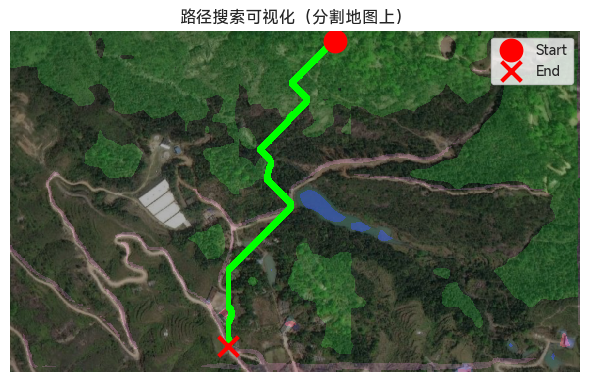

In [317]:
img = io.imread(img_path)  # shape: (H, W, 3)

# === ÁªòÂà∂Ë∑ØÂæÑÔºàÁªøËâ≤Ôºâ ===
overlay = img.copy()[:, :, :3]
print(overlay.shape)
overlay = overlay_mask_on_image(overlay, mask_val, id2color, alpha=0.3)
path_color = [0, 255, 0]  # RGB ÁªøËâ≤
thickness = 5  # ÂèØË∞ÉÁ≤óÁªÜ

h, w = overlay.shape[:2]
for i, j in path:
    for di in range(-thickness, thickness + 1):
        for dj in range(-thickness, thickness + 1):
            ni, nj = i + di, j + dj
            if 0 <= ni < h and 0 <= nj < w:
                overlay[ni, nj] = path_color

plt.figure(figsize=(6, 6))
io.imshow(overlay)

# Ëµ∑ÁÇπÂúÜÂúàÔºàoÔºâ
plt.scatter(start_idx[1], start_idx[0], c="red", marker="o", s=200, label="Start", linewidth=3)
# ÁªàÁÇπÂèâÂè∑ÔºàxÔºâ
plt.scatter(end_idx[1], end_idx[0], c="red", marker="x", s=200, label="End", linewidth=3)
plt.title("Ë∑ØÂæÑÊêúÁ¥¢ÂèØËßÜÂåñÔºàÂàÜÂâ≤Âú∞Âõæ‰∏äÔºâ")
plt.legend()
plt.axis("off")
plt.tight_layout()
# plt.show()

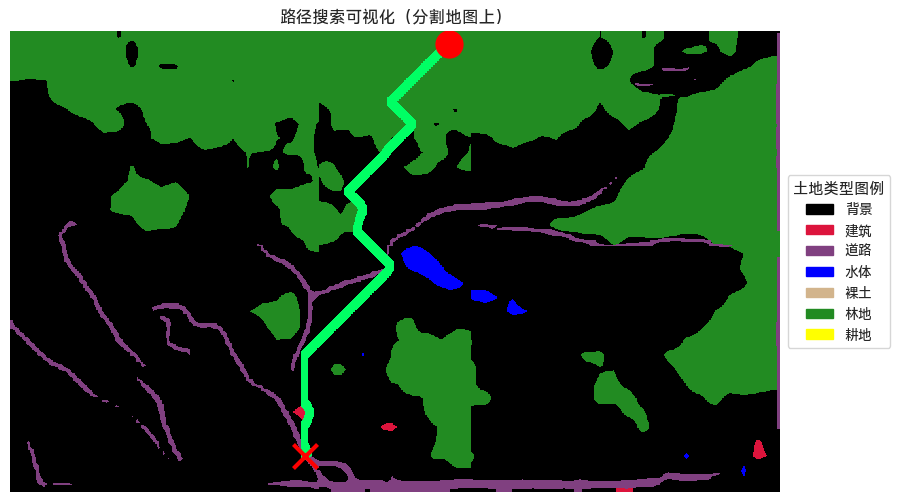

In [318]:
# === ÁªòÂà∂Ë∑ØÂæÑÔºàÁªøËâ≤Ôºâ ===
overlay = cost_map.copy()
overlay = np.stack([overlay] * 3, axis=-1)
overlay = np.log10(overlay) ** 0.5
overlay = overlay_mask_on_image(overlay, mask_val, id2color, alpha=1.0)
path_color = [0, 255, 100]  # RGB ÁªøËâ≤
thickness = 5  # ÂèØË∞ÉÁ≤óÁªÜ

h, w = overlay.shape[:2]
for i, j in path:
    for di in range(-thickness, thickness + 1):
        for dj in range(-thickness, thickness + 1):
            ni, nj = i + di, j + dj
            if 0 <= ni < h and 0 <= nj < w:
                overlay[ni, nj] = path_color

plt.figure(figsize=(8, 6))
io.imshow(overlay)

# Ëµ∑ÁÇπÂúÜÂúàÔºàoÔºâ
plt.scatter(start_idx[1], start_idx[0], c="red", marker="o", s=300, label="Start", linewidths=3)
# ÁªàÁÇπÂèâÂè∑ÔºàxÔºâ
plt.scatter(end_idx[1], end_idx[0], c="red", marker="x", s=300, label="End", linewidths=3)
plt.title("Ë∑ØÂæÑÊêúÁ¥¢ÂèØËßÜÂåñÔºàÂàÜÂâ≤Âú∞Âõæ‰∏äÔºâ")
plt.legend()
plt.axis("off")
plt.tight_layout()
# plt.show()
import matplotlib.patches as mpatches

# ÊûÑÂª∫Âõæ‰æãÂè•ÊüÑ
legend_patches = []
for idx, row in df_label.iterrows():
    class_id = row["Á±ªÂà´ÁºñÂè∑"]
    label_cn = row["Á±ªÂà´ÂêçÁß∞Ôºà‰∏≠ÊñáÔºâ"]
    color_rgb = id2color[class_id] / 255.0  # ÂΩí‰∏ÄÂåñ
    patch = mpatches.Patch(color=color_rgb, label=label_cn)
    legend_patches.append(patch)

plt.legend(
    handles=legend_patches,
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),  # Âè≥ËæπÂõæÂ§ñ‰∏≠Èó¥
    borderaxespad=0.0,
    title="ÂúüÂú∞Á±ªÂûãÂõæ‰æã",
    fontsize=10,
    title_fontsize=11,
    frameon=True
)


In [319]:
!jupyter nbconvert --to html road_plan5.ipynb
!jupyter nbconvert --to markdown road_plan5.ipynb

[NbConvertApp] Converting notebook road_plan5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 1669254 bytes to road_plan5.html
[NbConvertApp] Converting notebook road_plan5.ipynb to markdown
[NbConvertApp] Support files will be in road_plan5_files\
[NbConvertApp] Writing 18834 bytes to road_plan5.md
